In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Get column names and types for reference
inspector.get_columns("measurement")
columns = inspector.get_columns("measurement")
for column in columns:  
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Preview table
meas_preview = engine.execute('SELECT * FROM measurement LIMIT 1')
for row in meas_preview:
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)


In [16]:
# Design a query to retrieve the last 12 months of precipitation data.
# Retrieve the most recent date in the dataset to calculate the last 12 months
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Retrieve the last 12 months of precipitation data
last_12_mo_data = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23').all()
prcp_and_date_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23').all()

In [17]:
#Load the query results into a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_and_date_data, columns=['date', 'precipitation'])
prcp_df.set_index('date', inplace=True)
prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [18]:
# Sort the DataFrame Values by date
prcp_df.sort_values(by=['date'])
prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


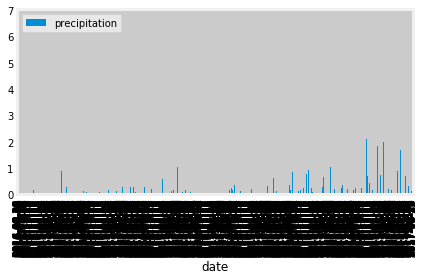

In [19]:
# Plot the results using the DataFrame plot method
prcp_df.plot.bar()
plt.tight_layout()
plt.show()